## Task 1: Prediction using Supervised ML

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

###  Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Reading data from remote link

In [2]:
Dataset_url = 'http://bit.ly/w-data'
df = pd.read_csv(Dataset_url) 
print("Data imported successfully")

Data imported successfully


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

### Data visualization with the help of scatter plot

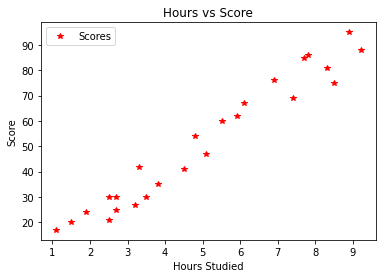

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='*',c = 'r') 
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

 Let's visualize and check the correlation between the data using heatmap

In [7]:
df.corr()  ##values range -1 to +1

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Number of hours given by students for studies')

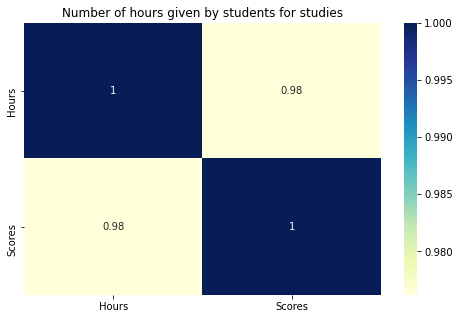

In [8]:
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(df.corr(),cmap= "YlGnBu", annot = True)
ax.set_title("Number of hours given by students for studies")

## Data Cleaning

Let's check if there is any missing value in our data set.

<AxesSubplot:>

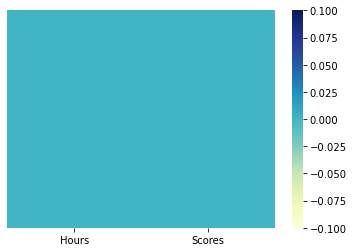

In [9]:
sns.heatmap(df.isnull(),cmap= "YlGnBu", yticklabels = False, cbar= True)

Well, above heatmap shows that there is no missing values present in our data. We can also check the missing values with the help of .info() or isnull() function.

### Lets divide the data into 'attributes' (inputs) and 'labels' (output)

In [10]:
x = df.iloc[:,:-1].values
y = df.iloc[:, 1].values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7 ,random_state=0)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


## Training the data using Linear Regression

We have split our data into training and testing sets, and now is finally the time to train our data.

In [13]:
model = LinearRegression()
s = time.time()
model.fit(x_train, y_train)
print("Training complete.")
print('Time Taken',(time.time() - s)*1000 , "ms")

Training complete.
Time Taken 1.995086669921875 ms


### Making Predictions

In [14]:
y_pred = model.predict(x_test)

In [15]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

### Comparing Actual vs Predicted 

In [16]:
pred_df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


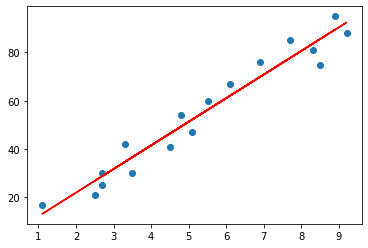

In [17]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color = 'r')
plt.show()

## Evaluate the performance of algorithm

In [18]:
from sklearn.metrics import r2_score
r2s = r2_score(y_test, y_pred)
print('R2 Score:', r2s)

R2 Score: 0.9568211104435257


R-squared is a statistical measure of how close the data are to the fitted regression line.<BR>
R-squared is always between 0 and 100%. Higher the R squared value, the better the model fits your data.

### Predicting score for given hours of study

In [19]:
Hours = 9.25
Test = np.array([Hours])
Test = Test.reshape(-1,1)
Prediction = model.predict(Test)
print(f"Number of hours = {Hours}")
print(f"Predicted score = {Prediction[0]}")

Number of hours = 9.25
Predicted score = 92.91505723477056
